In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel(r"E:\Real World project\Dummy data for training.xlsx")

In [3]:
df.shape

(191193, 11)

In [4]:
# Replace symbols with NaN
df.replace({'+': np.nan, '^': np.nan, '*': np.nan, 'REDACTED': np.nan}, inplace=True)

# Convert numeric columns
num_cols = ['Suggested Retail Price', 'Seller Offer', 'Customer Offer', 'Final Price']
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')

import numpy as np
df.replace("N/R", np.nan, inplace=True)

df.head()

C:\Users\Windows\AppData\Local\Temp\ipykernel_7164\2010967391.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'+': np.nan, '^': np.nan, '*': np.nan, 'REDACTED': np.nan}, inplace=True)
C:\Users\Windows\AppData\Local\Temp\ipykernel_7164\2010967391.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace("N/R", np.nan, inplace=True)


,Product Code,Service Center Size Code,Geographical Region,Suggested Retail Price,Seller Offer,Customer Offer,Offer Selected from Seller or Customer,Final Price,Default Pricing,First Offer Made By,Product Line Type
0,99285,23.0,"Abilene, TX",194.24,505.61,191.73,In Favor of Seller,505.61,No,Seller,Basket
1,99285,23.0,"Abilene, TX",194.24,505.61,268.26,In Favor of Seller,505.61,No,Seller,Basket
2,99283,23.0,"Abilene, TX",76.90,189.41,75.90,In Favor of Seller,189.41,No,Seller,Single
3,99291,23.0,"Abilene, TX",317.54,936.18,358.42,In Favor of Seller,936.18,No,Seller,Single
4,99284,23.0,"Abilene, TX",202.78,531.68,330.24,In Favor of Seller,531.68,No,Seller,Single


In [5]:
df = df.drop(['Default Pricing', 'First Offer Made By'], axis=True)

In [6]:
df = df.drop(['Geographical Region', 'Service Center Size Code','Product Code','Product Line Type'], axis=True)

In [7]:
df.replace({'+': np.nan, '^': np.nan, 'REDACTED': np.nan, '*': np.nan}, inplace=True)
df = df.dropna()


In [8]:
df.isnull().sum()

Suggested Retail Price                    0
Seller Offer                              0
Customer Offer                            0
Offer Selected from Seller or Customer    0
Final Price                               0
dtype: int64

## label encoding

In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for col in ['Offer Selected from Seller or Customer']:
    df[col] = encoder.fit_transform(df[col].astype(str))

In [10]:
df

,Suggested Retail Price,Seller Offer,Customer Offer,Offer Selected from Seller or Customer,Final Price
0,194.24,505.61,191.73,1,505.61
1,194.24,505.61,268.26,1,505.61
2,76.90,189.41,75.90,1,189.41
3,317.54,936.18,358.42,1,936.18
4,202.78,531.68,330.24,1,531.68
...,...,...,...,...,...
191106,166.53,522.80,379.97,1,522.80
191107,166.53,522.80,379.97,1,522.80
191108,166.53,522.80,379.97,1,522.80
191109,166.53,522.80,379.97,1,522.80


## Feature Correlation Heatmap

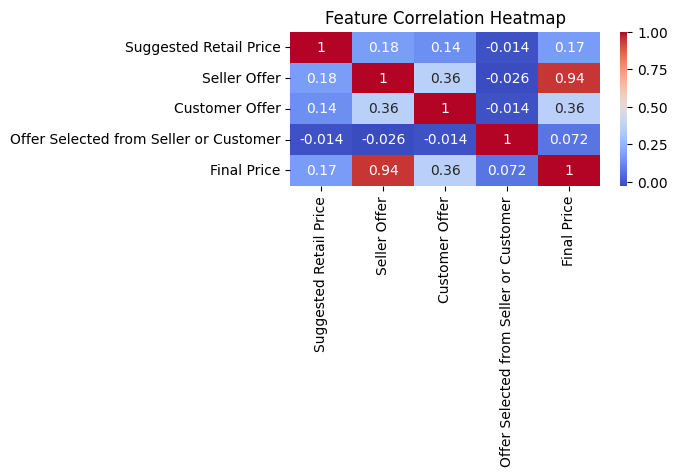

In [11]:
import seaborn as sns

plt.figure(figsize=(5,2))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


## Train test split

In [12]:
X = df.drop(['Final Price'] , axis=1)
y = df['Final Price']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train , x_test , y_train , y_test  = train_test_split(X , y , test_size=0.2 , random_state=42)

## Apply scaling only on x_train, then transform x_test using the same scaler

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [29]:
from sklearn.linear_model import LinearRegression
# from sklearn.ensemble import RandomForestRegressor
# model = RandomForestRegressor(n_estimators=200, random_state=42)
model  = LinearRegression()
model.fit(x_train , y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## predict

In [30]:
y_pred = model.predict(x_test)

In [31]:
y_pred

array([  618.59076589,   725.49755643, -1076.28969354, ...,
         423.26602231,   903.56042601,  1002.25543004], shape=(25269,))

In [32]:
model.score(x_test , y_pred) * 100

100.0

In [33]:
from sklearn.metrics import r2_score , mean_squared_error

In [34]:
r2 = r2_score(y_test , y_pred)
mse = mean_squared_error(y_test , y_pred)

In [35]:
print('the r2 score is : ' , r2) 
print('the mean squared error is : ' , mse) 

the r2 score is :  0.9151029855880428
the mean squared error is :  3098911.553789342


In [23]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, x_train, y_train, cv=5, scoring='r2')
print(scores.mean())


0.9974154908520123


In [24]:
test_data_scaled = scaler.transform([[317.54, 936.18,358.42, 1]])

# Predict
predicted_value = model.predict(test_data_scaled)
print(f"Predicted value: {predicted_value[0]:.2f}")

C:\Users\Windows\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Predicted value: 929.59


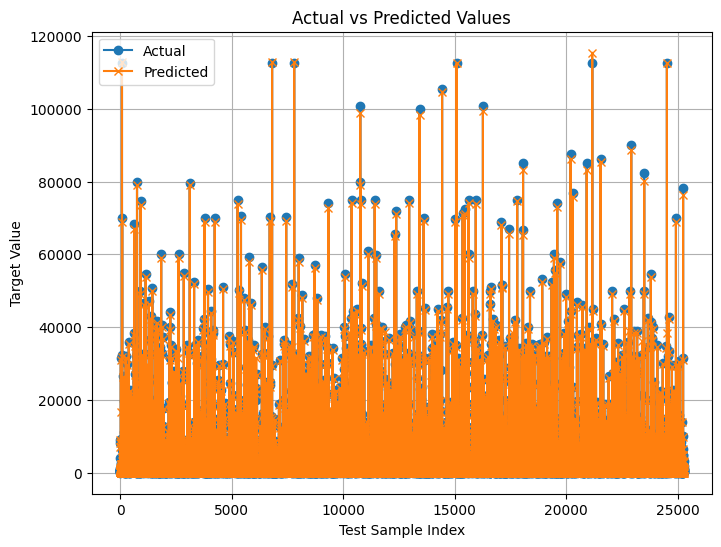

In [25]:
plt.figure(figsize=(8, 6))
plt.plot(range(len(y_test)), y_test, label='Actual', marker='o')
plt.plot(range(len(y_pred)), y_pred, label='Predicted', marker='x')

plt.title('Actual vs Predicted Values')
plt.xlabel('Test Sample Index')
plt.ylabel('Target Value')
plt.legend()
plt.grid(True)
plt.show()

## Actual vs Predicted Prices

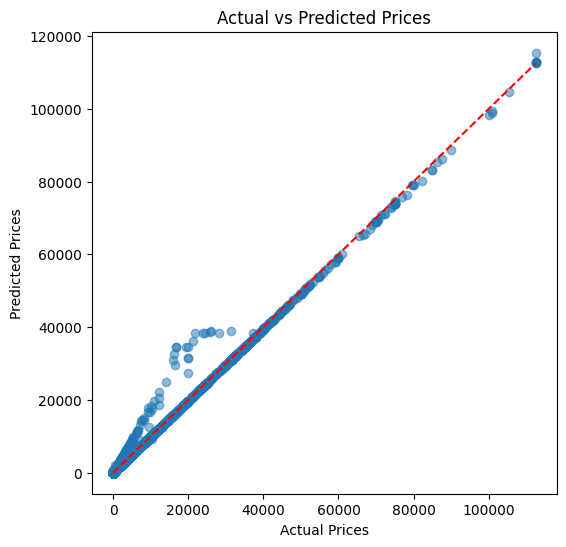

In [26]:
y_pred = model.predict(x_test)
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

## Distribution of Target Variable

## Residuals Plot

In [36]:
df.shape

(126343, 5)